<a href="https://colab.research.google.com/github/robertferro/studio-estetica/blob/main/projeto_studio_estetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Planejamento 

 - Fazer a previsão da quantidade de procedimentos realizados e do faturamento, nos meses que duraram o isolamento social.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importando e tratando a base de dados

 - Importandos os dados do Studio de estética.



In [2]:
url='https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados-studio/studio_estetica.csv'

In [3]:
dados = pd.read_csv(url, sep=';', decimal=",")

In [4]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,NaN,30.0,40.0,50.0,10.0,80.0,450.0,100.0,80.0,80.0,250.0,150.0,80.0,250.0,80.0,150.0,0.0,0.0
1,23/12/2018,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
2,24/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26/12/2018,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,640.0


In [5]:
# dados.loc[435:480,:]

 - Excluindo os valores nulos

In [6]:
dados=dados.dropna()

In [7]:
# dados.loc[451:480,:]

 - Convertendo a coluna "data_atendimento" para o formato datetime

In [8]:
# dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'], errors='coerce')

In [9]:
# dados.loc[451:480,:]

## 3. EDA

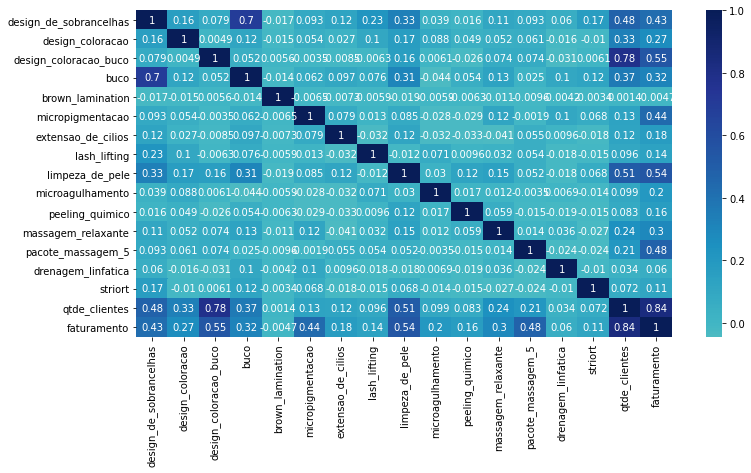

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True, center=0, cmap="YlGnBu")

In [11]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
design_de_sobrancelhas,729.0,0.400549,0.852469,0.0,0.0,0.0,0.0,5.0
design_coloracao,729.0,0.231824,0.583450,0.0,0.0,0.0,0.0,4.0
design_coloracao_buco,729.0,0.703704,1.944985,0.0,0.0,0.0,1.0,19.0
buco,729.0,0.215364,0.580342,0.0,0.0,0.0,0.0,4.0
brown_lamination,729.0,0.001372,0.037037,0.0,0.0,0.0,0.0,1.0
micropigmentacao,729.0,0.031481,0.180924,0.0,0.0,0.0,0.0,2.0
extensao_de_cilios,729.0,0.039781,0.200776,0.0,0.0,0.0,0.0,2.0
lash_lifting,729.0,0.029492,0.183883,0.0,0.0,0.0,0.0,2.0
limpeza_de_pele,729.0,0.407407,0.795333,0.0,0.0,0.0,1.0,5.0
microagulhamento,729.0,0.024691,0.155289,0.0,0.0,0.0,0.0,1.0


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 1 to 729
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        729 non-null    object 
 1   design_de_sobrancelhas  729 non-null    float64
 2   design_coloracao        729 non-null    float64
 3   design_coloracao_buco   729 non-null    float64
 4   buco                    729 non-null    float64
 5   brown_lamination        729 non-null    float64
 6   micropigmentacao        729 non-null    float64
 7   extensao_de_cilios      729 non-null    float64
 8   lash_lifting            729 non-null    float64
 9   limpeza_de_pele         729 non-null    float64
 10  microagulhamento        729 non-null    float64
 11  peeling_quimico         729 non-null    float64
 12  massagem_relaxante      729 non-null    float64
 13  pacote_massagem_5       729 non-null    float64
 14  drenagem_linfatica      729 non-null    fl

In [13]:
# dados.loc[(dados['data_atendimento'] == "24/05/2019")]

In [14]:
# dados.loc[150:155,:]

 - Agrupando os dados por mês

In [15]:
# dados = dados.set_index('data_atendimento')
# dados_por_mes=dados.resample('M').sum()
# dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [16]:
# dados.loc[dados['data_atendimento'] =="01/04/2020"]

In [17]:
# erro no arquivo do excel, quandoa coluna data_atendimento e converida para datetime
# algumas datas se desorganizam o que afeta os valores  
# 


 - Visualizando a distribuição do faturamento e da quantidade de clientes

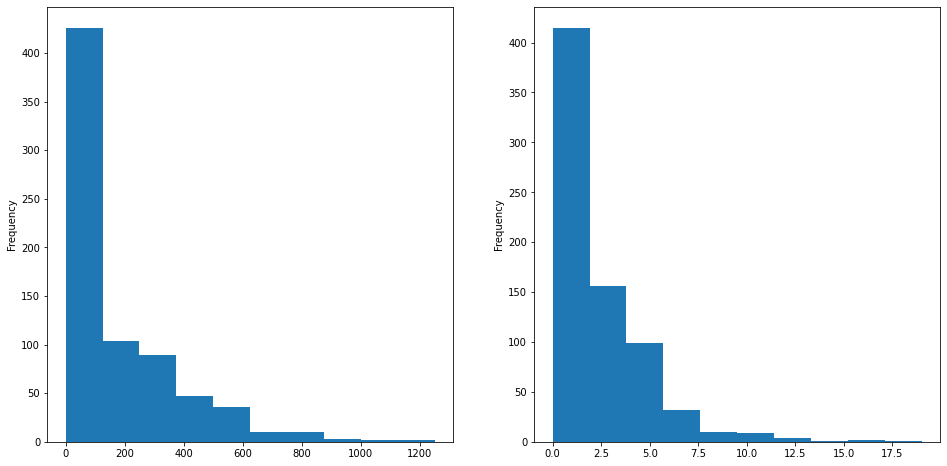

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
dados.faturamento.plot(kind="hist",ax=ax[0])
dados.qtde_clientes.plot(kind="hist",ax=ax[1])

Text(0, 0.5, 'faturamento')

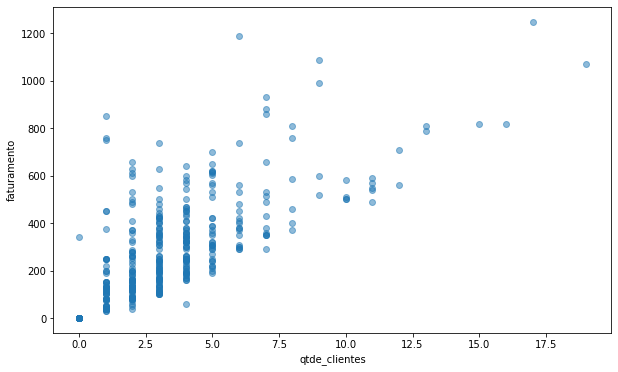

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['qtde_clientes'], dados['faturamento'],alpha=0.5)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('qtde_clientes')
plt.ylabel('faturamento')

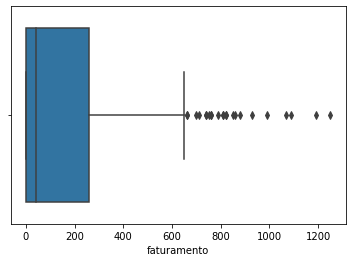

In [20]:
sns.boxplot(x=dados['faturamento'])

 - ## Filtrando outliers.

In [21]:
dados_sem_outliers =dados.query('qtde_clientes <=7  and faturamento <= 700 and data_atendimento <="21/03/2020"')

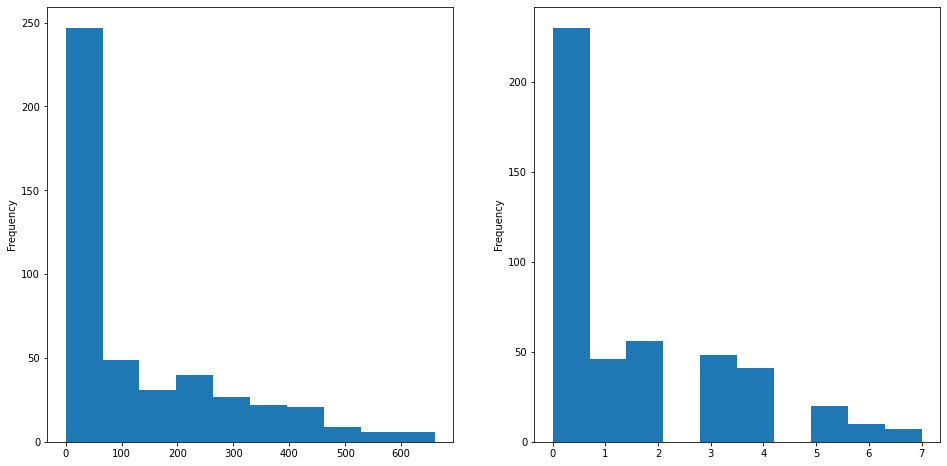

In [22]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
dados_sem_outliers.faturamento.plot(kind="hist",ax=ax[0])
dados_sem_outliers.qtde_clientes.plot(kind="hist",ax=ax[1])

Text(0, 0.5, 'faturamento')

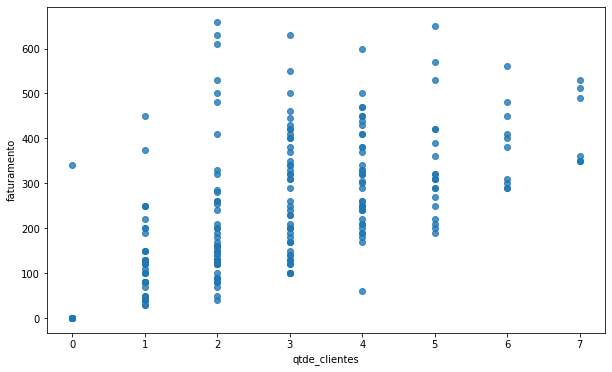

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_sem_outliers['qtde_clientes'], dados_sem_outliers['faturamento'], alpha=0.8)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('qtde_clientes')
plt.ylabel('faturamento')

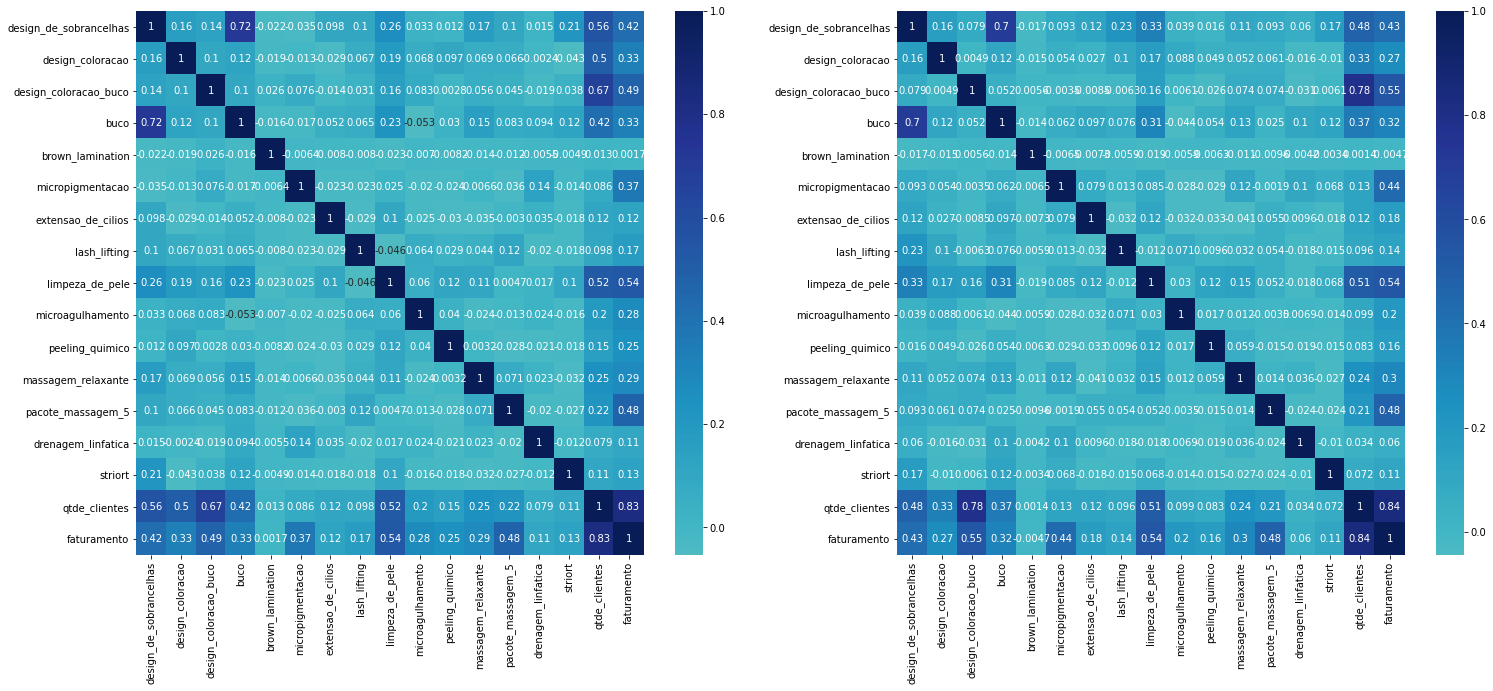

In [24]:
# comparando a correlação entre os 2 datasets, sem outliers e com outliers
fig, ax = plt.subplots(1,2,figsize=(25,10))

sns.heatmap(dados_sem_outliers.corr(), annot=True,center=0, cmap='YlGnBu',ax=ax[0])
sns.heatmap(dados.corr(), annot=True,center=0, cmap='YlGnBu', ax=ax[1])

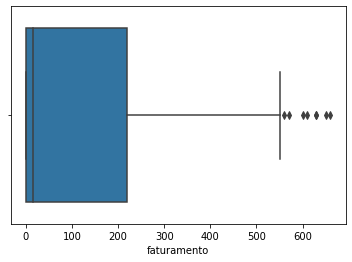

In [25]:
sns.boxplot(x=dados_sem_outliers['faturamento'])

In [26]:
dados_sem_outliers.shape

(458, 18)

- Previsão do faturamento sem outliers:
 - Calcular a média da quantidade de clientes por dia 
 - Calcular a média do valor gasto por cliente

In [27]:
# soma do faturamento dividido pela quantidade de clientes , retorna o valor médio  gasto por cliente
valor_medio_de_consumo =dados_sem_outliers.faturamento.sum()/dados_sem_outliers.qtde_clientes.sum()
valor_medio_de_consumo

84.13555555555556

In [28]:
# quantidade de clientes dividido pela quantidade de dias , retorna a quantidade média de clientes que frequentam o espaço por dia
media_clientes_por=dados_sem_outliers.qtde_clientes.sum()/len(dados_sem_outliers.data_atendimento)
media_clientes_por

1.4737991266375545

In [29]:
# Calculando a previsão média de faturamento 
previsao_faturamento=media_clientes_por*valor_medio_de_consumo
previsao_faturamento

123.99890829694323

 ## 4. Machine learning
 
 
  
   -  Definir X_train e X_test : 
       - X_train são os dados antes da pandemia 
       - X_test são os dados após a pandemia
       - x prede sao os dados durante a pandemia 

 - Definindo as amostras de treino e teste

In [30]:
from sklearn.model_selection import train_test_split

In [58]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 715 to 511
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        546 non-null    object 
 1   design_de_sobrancelhas  546 non-null    float64
 2   design_coloracao        546 non-null    float64
 3   design_coloracao_buco   546 non-null    float64
 4   buco                    546 non-null    float64
 5   brown_lamination        546 non-null    float64
 6   micropigmentacao        546 non-null    float64
 7   extensao_de_cilios      546 non-null    float64
 8   lash_lifting            546 non-null    float64
 9   limpeza_de_pele         546 non-null    float64
 10  microagulhamento        546 non-null    float64
 11  peeling_quimico         546 non-null    float64
 12  massagem_relaxante      546 non-null    float64
 13  pacote_massagem_5       546 non-null    float64
 14  drenagem_linfatica      546 non-null    

In [60]:
train

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
715,06/12/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,04/04/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,18/12/2020,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100.0
399,25/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,27/02/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,31/03/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,10/11/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,09/01/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,550.0
366,23/12/2019,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,60.0


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 231 to 103
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        183 non-null    object 
 1   design_de_sobrancelhas  183 non-null    float64
 2   design_coloracao        183 non-null    float64
 3   design_coloracao_buco   183 non-null    float64
 4   buco                    183 non-null    float64
 5   brown_lamination        183 non-null    float64
 6   micropigmentacao        183 non-null    float64
 7   extensao_de_cilios      183 non-null    float64
 8   lash_lifting            183 non-null    float64
 9   limpeza_de_pele         183 non-null    float64
 10  microagulhamento        183 non-null    float64
 11  peeling_quimico         183 non-null    float64
 12  massagem_relaxante      183 non-null    float64
 13  pacote_massagem_5       183 non-null    float64
 14  drenagem_linfatica      183 non-null    

In [62]:
test

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
231,10/08/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,03/12/2019,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,710.0
333,20/11/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,03/07/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725,16/12/2020,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,15/11/2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,430.0
530,04/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,24/04/2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0
41,01/02/2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0


 - Normalizando os valores de teste e de treino

In [63]:
train['qtde_clientes']=train['qtde_clientes'].apply(np.log1p)
train['faturamento']=train['faturamento'].apply(np.log1p)

In [64]:
test['qtde_clientes']=test['qtde_clientes'].apply(np.log1p)
test['faturamento']=test['faturamento'].apply(np.log1p)

In [65]:
X_cols = ['design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort','qtde_clientes'
         ]
y_col = ['faturamento']

In [66]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [67]:
 X_train.head()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
727,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.609438


 - Machine learning

In [68]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [69]:
y_pred = neigh.predict(X_test)

In [70]:
# Root Mean Squared Error - RMSE
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.34091221470804706

In [71]:
# Mean Squared Error - MSE
np.mean((y_pred-y_test.values)**2)

0.11622113813714559

In [72]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.18860861067349752

In [73]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9849363605417717

## 5. Triagem com outros modelos

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.9149462637074706

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.9945403304503447
Treinando RandomForestRegressor
Train score 0.9985571080058895
Test score 0.9918252329148379
Treinando MLPRegressor
Train score 0.9884261062245953
Test score 0.9785253824501958
Treinando XGBRegressor
[16:13:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9972347809518733
Test score 0.9933987692886163


 - Repetindo com validação cruzada.

In [76]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=5)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Validation score [0.98905653 0.9520007  0.98888963 0.98975009 0.98571407]
Test score 0.9948682378291483
Treinando RandomForestRegressor
Train score 0.9980024459902814
Validation score [0.99241627 0.95298239 0.99489536 0.9922157  0.99397907]
Test score 0.9914597982402726
Treinando MLPRegressor
Train score 0.9884528670237601
Validation score [0.95682305 0.96796828 0.97543699 0.97071245 0.97157086]
Test score 0.9792694224045033
Treinando XGBRegressor
[16:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

In [91]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

[17:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=1,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'max_depth': [3, 4, 5, 6, 7, 8],
     

In [92]:
gs.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 250}

In [93]:
reg = gs.best_estimator_

In [94]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[17:59:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9999544588231826
Validation score [0.97903109 0.99503207 0.99622045]
Test score 0.9966244486197151


In [95]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)